# About this notebook 

#### Feature: Media (photo and video counts)

This is one of a series of notebooks (one for each feature of interest) that explores the feature for missing data, data characteristics, correlation with the rate of adoption (predictor variable) and other points of interest that might be helpful to know (and deal with) prior to machine learning.

<div class="span5 alert alert-success">
<p> <I> Feature Description: </I> The "Photos" and "Videos" data represents the number of photos and videos loaded for each pet.  
    <I> Source: </I> https://www.kaggle.com/c/petfinder-adoption-prediction/data  </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Predictor (Adoption Speed) Description: </I> 

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.   
<br> 
The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.    
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.    
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.    
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.    
4 - No adoption after 100 days of being listed.    

</p>
</div>

In [114]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [115]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#Import the csv file
dfi = pd.read_csv('train.csv')
dfi.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3,3


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>  </p>
</div>

In [117]:
#Create Photos and Videos Dataframe
dfa = dfi[['PhotoAmt', 'VideoAmt','AdoptionSpeed','Type']]
dfa['pvsum'] = dfa.PhotoAmt + dfa.VideoAmt
dfa.columns = ['photoamt','videoamt','adoptionspeed','type','pvsum']

In [118]:
# Percentage of missing values in each column
pd.DataFrame(
    dfa.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,photoamt,videoamt,adoptionspeed,type,pvsum
% Missing Values,0.0,0.0,0.0,0.0,0.0


<div class="span5 alert alert-info">
<p> <B>  Characteristics of the data: </B>  </p>
</div>

In [119]:
#Create a dataframe of pets with no media
dfnm = dfa[dfa.pvsum == 0]
dfnm = dfnm.reset_index()

dfnm.describe()

,index,photoamt,videoamt,adoptionspeed,type,pvsum
count,340.000000,340.0,340.0,340.000000,340.000000,340.0
mean,6466.332353,0.0,0.0,3.105882,1.429412,0.0
std,4522.155227,0.0,0.0,1.326148,0.495722,0.0
min,4.000000,0.0,0.0,0.000000,1.000000,0.0
25%,1937.500000,0.0,0.0,2.000000,1.000000,0.0
50%,5962.000000,0.0,0.0,4.000000,1.000000,0.0
75%,10109.250000,0.0,0.0,4.000000,2.000000,0.0
max,14980.000000,0.0,0.0,4.000000,2.000000,0.0


In [120]:
#Create a dataframe of pets with at least 1 photo and 1 video
dfpv1 = dfa[(dfa.photoamt > 0) & (dfa.videoamt > 0)]
dfpv1 = dfpv1.reset_index()

dfpv1.describe()

,index,photoamt,videoamt,adoptionspeed,type,pvsum
count,573.000000,573.00000,573.000000,573.000000,573.000000,573.000000
mean,8143.780105,7.17801,1.483421,2.445026,1.460733,8.661431
std,4304.631395,5.73723,1.009650,1.107443,0.498891,6.209388
min,180.000000,1.00000,1.000000,0.000000,1.000000,2.000000
25%,4606.000000,4.00000,1.000000,2.000000,1.000000,5.000000
50%,8105.000000,5.00000,1.000000,2.000000,1.000000,7.000000
75%,12101.000000,9.00000,2.000000,3.000000,2.000000,11.000000
max,14979.000000,30.00000,8.000000,4.000000,2.000000,38.000000


In [121]:
#Create a dataframe of pets with at least 5 photos and 2 videos
dfpv5 = dfa[(dfa.photoamt > 4) & (dfa.videoamt > 1)]
dfpv5 = dfpv5.reset_index()

dfpv5.describe()

,index,photoamt,videoamt,adoptionspeed,type,pvsum
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,8224.256410,11.820513,2.914530,2.547009,1.401709,14.735043
std,4572.645032,7.016748,1.336314,1.038033,0.492352,7.697283
min,180.000000,5.000000,2.000000,0.000000,1.000000,7.000000
25%,4427.000000,6.000000,2.000000,2.000000,1.000000,9.000000
50%,8395.000000,10.000000,2.000000,3.000000,1.000000,12.000000
75%,12261.000000,16.000000,3.000000,3.000000,2.000000,19.000000
max,14952.000000,30.000000,8.000000,4.000000,2.000000,38.000000


<div class="span5 alert alert-info">
<p> <B>  Correlation with the Adoption Rate: </B>  </p>
</div>

In [122]:
#Dataframe to calculate correlation of amount of photos, amount of videos, and combined photos and videos
dfa.head(1)

,photoamt,videoamt,adoptionspeed,type,pvsum
0,3,0,3,1,3


In [123]:
#Calculate pearson correlation between amount of photos and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfa.photoamt,dfa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,2)*100) + '%')

Correlation value: -2.0%


In [124]:
#Calculate pearson correlation between amount of videos and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfa.videoamt,dfa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,2)*100) + '%')

Correlation value: -0.0%


In [125]:
#Calculate pearson correlation between amount of photos & videos and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfa.pvsum,dfa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,2)*100) + '%')

Correlation value: -2.0%


In [126]:
#Create dataframe that when 0 photos and  0 videos populates a column with a 0 value and any photo or video populates 
#with a value of 1

#Function to populate column
def mediapresent(myinput):
    media = ''
    
    if myinput == 0 :
        media = 0
    else:
        media = 1
    
    return media

dfc = dfa

dfc['mediapresent'] = dfa.pvsum.apply(mediapresent)

dfc = dfc.reset_index()

In [127]:
#Calculate pearson correlation when 0 photos and  0 videos populates a column with a 0 value and any photo or video populated 
#with a value of 1

def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfa.mediapresent,dfa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,2)*100) + '%')

Correlation value: -8.0%


<div class="span5 alert alert-info">
<p> <B>  Chart of Dogs and Cats with and without photos: </B>  </p>
</div>

In [128]:
#Create dataframe for chart
dfp = dfa[['type','photoamt']]

In [129]:

mylist = []
for i, r in dfp.iterrows():
    
    if r['type'] == 1:
        if r['photoamt'] <= 5:
            mylist.append('dog 0-5')
        
        elif r['photoamt'] > 5 and r['photoamt'] <= 10:
            mylist.append('dog 5-10')
            
        else:
            mylist.append('dog >10')
        
    if r['type'] == 2:
        if r['photoamt'] <= 5:
            mylist.append('cat 0-5')
        
        elif r['photoamt'] > 5 and r['photoamt'] <= 10:
            mylist.append('cat 5-10')
            
        else:
            mylist.append('cat >10')

dfp['category'] = mylist

dfp = dfp.sort_values('category')

dfp.head()

,type,photoamt,category
5273,2,4,cat 0-5
4258,2,5,cat 0-5
4257,2,5,cat 0-5
4256,2,0,cat 0-5
4255,2,2,cat 0-5


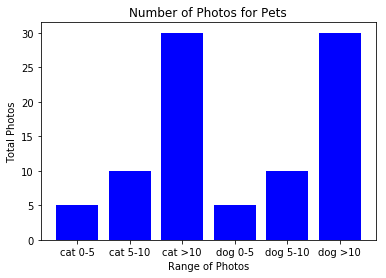

<Figure size 648x648 with 0 Axes>

In [133]:
#bar plot of photo counts
dfb = dfp.drop(['type'],axis=1)

#Bar plot of age in years
plt.bar(dfb.category, dfb.photoamt, color='b', align='center', alpha=0.5)
plt.ylabel('Total Photos')
plt.xlabel('Range of Photos')
plt.title('Number of Photos for Pets')
plt.figure(figsize=(9,9))
plt.show()